In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def find_voltages(tmatrix,current):
    try:
        voltage = np.linalg.solve(tmatrix[1:, 1:], current[1:])
    except np.linalg.LinAlgError as err:
        if 'Singular matrix' in str(err):
            print("Hi there, singular matrix here")
            voltage = [0,0,0,0,0]
        else:
            raise
    return [0, *voltage]

def resistance_xx(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 3)

def resistance_xy(tmatrix):
    current = [1, 0, 0, -1, 0, 0]
    voltage = find_voltages(tmatrix,current)
    
    def resistance(lead1, lead2):
        return voltage[lead1-1]-voltage[lead2-1]

    return resistance(2, 6)

# define G matrix

In [20]:
current= [-1, 0, 0, 0, 0, 1]

def tmatrix(l,r):
    return np.array([[l+r,-r,0,0,0,-l], [-l,l+r,-r,0,0,0], [0,-l,l+r,-r,0,0], [0,0,-l,l+r,-r,0], [0,0,0,-l,l+r,-r], [-r,0,0,0,-l,l+r] ])

def pv(l,r):
    plt.scatter(range(1,7), find_voltages(tmatrix(l,r),current))

def rm(l,r):
    return resistance_xx(tmatrix(l,r)), resistance_xy(tmatrix(l,r))

In [21]:
# 将两行代码都用 print() 函数包裹起来
t = tmatrix(0, 1)
print(t)
voltages = find_voltages(t, current)
print(voltages)

[[ 1 -1  0  0  0  0]
 [ 0  1 -1  0  0  0]
 [ 0  0  1 -1  0  0]
 [ 0  0  0  1 -1  0]
 [ 0  0  0  0  1 -1]
 [-1  0  0  0  0  1]]
[0, np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [22]:
t=tmatrix(0,1)

In [23]:
find_voltages(t,current)

[0,
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0),
 np.float64(1.0)]

Text(0, 0.5, 'V/I')

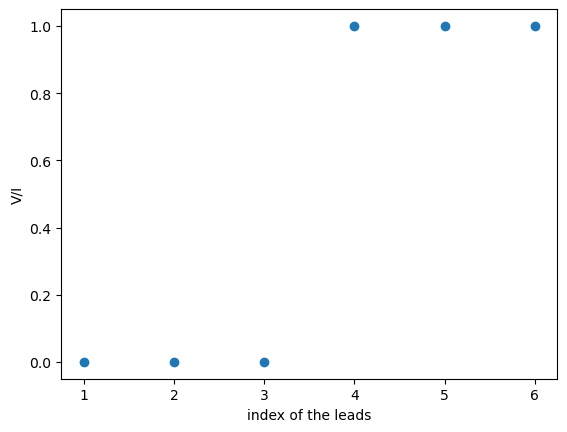

In [9]:
pv(1,0)
plt.xlabel('index of the leads')
plt.ylabel('V/I')